# Overview :
    


This dataset provides a comprehensive overview of customer interactions with an online retail store, aiming to predict customer churn based on various behavioral and demographic features.

In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [100]:
pip install imbalanced-learn

In [2]:
retail = pd.read_csv('./online_retail_customer_churn.csv')


In [3]:
retail.head(20)

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22.0,453.80,2,0,3.0,129,True,Responded,False
1,2,65,Male,79.51,9025.47,13,77.0,22.90,2,2,3.0,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71.0,50.53,5,2,2.0,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33.0,411.83,5,3,5.0,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43.0,101.19,3,0,5.0,242,False,Unsubscribed,True
5,6,57,Male,190.43,255.19,19,85.0,417.78,5,1,4.0,130,False,Unsubscribed,False
6,7,27,Male,172.13,3512.55,3,77.0,316.18,0,3,1.0,61,True,Unsubscribed,False
7,8,37,Other,88.90,7270.90,4,87.0,63.61,3,4,3.0,224,False,Ignored,False
8,9,39,Other,24.46,4935.49,1,21.0,173.80,9,2,4.0,126,True,Responded,True
9,10,68,Other,169.59,9803.57,17,34.0,481.18,6,1,2.0,171,True,Unsubscribed,False


# Description of Columns:

Customer_ID: A unique identifier for each customer.

Age: The customer's age.

Gender: The customer's gender (Male, Female, Other).

Annual_Income: The annual income of the customer in thousands of dollars.

Total_Spend: The total amount spent by the customer in the last year.

Years_as_Customer: The number of years the individual has been a customer of the store.

Num_of_Purchases: The number of purchases the customer made in the last year.

Average_Transaction_Amount: The average amount spent per transaction.

Num_of_Returns: The number of items the customer returned in the last year.

Num_of_Support_Contacts: The number of times the customer contacted support in the last year
.
Satisfaction_Score: A score from 1 to 5 indicating the customer's satisfaction with the store.

Last_Purchase_Days_Ago: The number of days since the customer's last purchase.

Email_Opt_In: Whether the customer has opted in to receive marketing emails.

Promotion_Response: The customer's response to the last promotional campaign (Responded, Ignored, Unsubscribed).

Target_Churn: Indicates whether the customer churned (True or False).

In [4]:
retail['Target_Churn'].value_counts()

False    707
True     293
Name: Target_Churn, dtype: int64

In [5]:
retail.describe()

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,985.000000,1000.00000,1000.000000,991.000000,1000.000000,1000.000000,1000.000000,993.000000,1000.000000
mean,500.500000,43.267000,112.344122,5080.79265,9.727000,49.506559,266.876530,4.612000,1.934000,2.974824,182.890000
std,288.819436,15.242311,52.842920,2862.12335,5.536346,28.592040,145.873445,2.896869,1.402716,1.392799,104.391319
min,1.000000,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,250.750000,30.000000,67.950000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,500.500000,43.000000,115.050000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,750.250000,56.000000,158.580000,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,1000.000000,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [6]:
retail.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases              float64
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score            float64
Last_Purchase_Days_Ago          int64
Email_Opt_In                   object
Promotion_Response             object
Target_Churn                     bool
dtype: object

In [7]:
retail.isnull().sum()

Customer_ID                    0
Age                            0
Gender                         0
Annual_Income                 15
Total_Spend                    0
Years_as_Customer              0
Num_of_Purchases               9
Average_Transaction_Amount     0
Num_of_Returns                 0
Num_of_Support_Contacts        0
Satisfaction_Score             7
Last_Purchase_Days_Ago         0
Email_Opt_In                  13
Promotion_Response             8
Target_Churn                   0
dtype: int64

### Handling Missing Values:



We see that Annual_Income, Satisfaction_Score,Email_Opt_in, Promotion Response have missing values. We handle them by imputing the mean for numerical fields and the mode for categorical fields, using values calculated across all records.

In [8]:
retail['Annual_Income'] = retail['Annual_Income'].fillna(retail['Annual_Income'].mean())
retail['Email_Opt_In']=retail['Email_Opt_In'].fillna(retail['Email_Opt_In'].mode()[0])
retail['Promotion_Response'] = retail['Promotion_Response'].fillna(retail['Promotion_Response'].mode()[0])

In [9]:
mean_value = round(retail['Num_of_Purchases'].mean())
retail['Num_of_Purchases'] = retail['Num_of_Purchases'].fillna(mean_value).astype(int)

In [10]:
mean_value = round(retail['Satisfaction_Score'].mean())
retail['Satisfaction_Score'] = retail['Satisfaction_Score'].fillna(mean_value).astype(int)

In [11]:
retail.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [12]:
retail['Num_of_Purchases'] = retail['Num_of_Purchases'].astype(int)
retail['Satisfaction_Score'] = retail['Satisfaction_Score'].astype(int)

In [55]:
retail.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int32
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int32
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

### We will be doing some analysis regarding how different fields impact customer churn.

### Age wise analyis of Target Churn

,Age
Target_Churn,
False,44.874116
True,39.389078


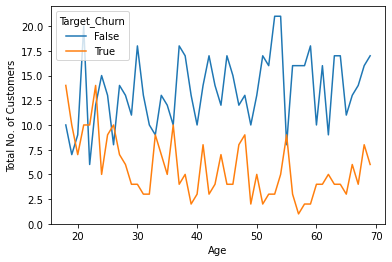

In [102]:
Age_Group=retail.groupby(['Age','Target_Churn'])['Customer_ID'].count()
Age_Group = Age_Group.unstack('Target_Churn')
Age_Group.plot(kind='line')
plt.xlabel('Age')
plt.ylabel('Total No. of Customers')
plt.legend(title='Target_Churn')

retail.groupby('Target_Churn')['Age'].mean().to_frame()


On average, customers who have churned are about 5.5 years younger than those who have not.

We observe that younger customers are more likely to churn out , probably due to different needs, preferences, or levels of brand loyalty compared to older customers.

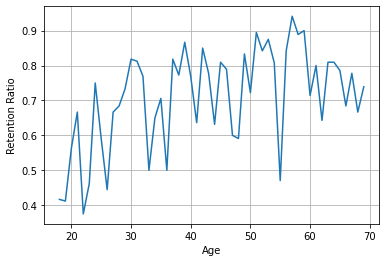

In [103]:
df=Age_Group.reset_index()
df['Retention Ratio']=df[False]/(df [False]+df[True]) 
plt.plot(df['Age'],df['Retention Ratio'])
plt.xlabel('Age')
plt.ylabel('Retention Ratio')
plt.grid()
plt.show()


### Retention Ratios

#### Retention ratio is a key metric used in customer churn analysis to measure the proportion of customers who continue to do business with a company over a specific period. We have calculated that using (No. of customers who did not churn out)/(Total No. of customers).

In this dataset we observe:

Younger age groups (below 20) show lower retention ratios, which might suggest that younger customers are less likely to be retained.
.

Middle-aged groups (30 to 50) tend to have higher retention ratios, possibly indicating stronger brand loyalty or satisfaction in this demographic.

### Gender wise analyis of Target Churn

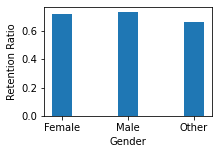

Target_Churn,False,True,Retention Ratio
Gender,,,
Female,247,95,0.722222
Male,245,89,0.733533
Other,215,109,0.663580


In [23]:
gender_grouped_by=retail.groupby(['Gender','Target_Churn'])['Customer_ID'].count().to_frame()
gender_grouped_by.rename(columns={'Customer_ID': 'Total Customers'}, inplace=True)
gender_grouped_by
gender_grouped_by_reset = gender_grouped_by.reset_index()
pivot_gender = gender_grouped_by_reset.pivot(index='Gender', columns='Target_Churn', values='Total Customers')
pivot_gender
pivot_gender['Retention Ratio']=pivot_gender[False]/(pivot_gender[False]+pivot_gender[True]) 
plt.figure(figsize=(3, 2)) 
plt.bar(pivot_gender.index,pivot_gender['Retention Ratio'],width=0.3)
plt.xlabel('Gender')
plt.ylabel('Retention Ratio') 
plt.show()
pivot_gender

We observe that the difference between Male and Female retention is minimal.

The notably lower retention among the "Other" gender group may suggest the need for more inclusive engagement strategies or further investigation into their unique experiences and needs.

### Satisfaction Score

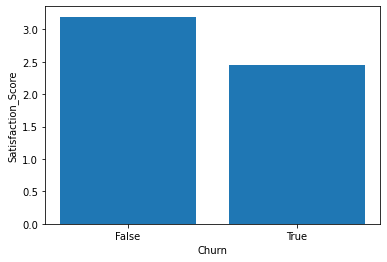

,Satisfaction_Score
Target_Churn,
False,3.195191
True,2.443686


In [24]:

grouped=retail.groupby('Target_Churn')['Satisfaction_Score'].mean()
plt.bar(grouped.index.astype(str),grouped.values,width=0.8)
plt.xlabel('Churn')
plt.ylabel('Satisfaction_Score')
plt.show()
retail.groupby('Target_Churn')['Satisfaction_Score'].mean().to_frame()




We observe that churned customers are less satisfied.

Satisfaction is linked to retention: Higher satisfaction appears to correlate with lower churn, suggesting that improving customer satisfaction could be an effective strategy to reduce churn.

### Email Opt-In 

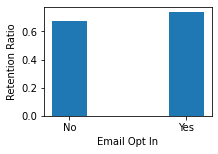

Target_Churn,False,True,Retention Ratio
Email_Opt_In,,,
False,315,153,0.673077
True,392,140,0.736842


In [56]:
email_grouped_by=retail.groupby(['Email_Opt_In','Target_Churn'])['Customer_ID'].count().to_frame()
email_grouped_by.rename(columns={'Customer_ID': 'Total Customers'}, inplace=True)
email_grouped_by
email_grouped_by_reset = email_grouped_by.reset_index()
pivot_email = email_grouped_by_reset.pivot(index='Email_Opt_In', columns='Target_Churn', values='Total Customers')
pivot_email['Retention Ratio']=pivot_email[False]/(pivot_email[False]+pivot_email[True]) 

plt.figure(figsize=(3, 2)) 
plt.bar(pivot_email.index,pivot_email['Retention Ratio'],width=0.3)
plt.xlabel('Email Opt In')
plt.ylabel('Retention Ratio') 
plt.xticks([False, True], ['No', 'Yes'])
plt.show()
pivot_email

The data suggests that email opt-in is associated with a higher retention ratio. However, difference is not much. 

Customers who opt-in for emails are slightly more likely to stay loyal with the company compared to those who do not.

### Number of Returns

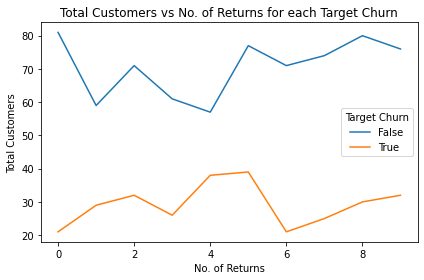

In [59]:
group=retail.groupby(['Num_of_Returns','Target_Churn'])['Customer_ID'].count().to_frame()
grouped_unstacked = group.unstack('Target_Churn')

grouped_unstacked.columns = grouped_unstacked.columns.droplevel(0)
grouped_unstacked.plot(kind='line')
plt.xlabel('No. of Returns')
plt.ylabel('Total Customers')
plt.title('Total Customers vs No. of Returns for each Target Churn')
plt.legend(title='Target Churn')
plt.tight_layout()
plt.show()

##retail.groupby(['Num_of_Returns','Target_Churn'])['Customer_ID'].count().to_frame()

The graph shows the relationship between the number of returns and total customers for each target churn category.

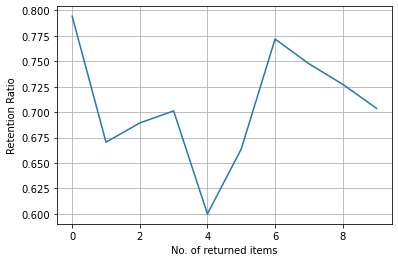

In [104]:
grouped_unstacked ['Retention Ratio']=grouped_unstacked[False]/(grouped_unstacked [False]+grouped_unstacked [True]) 
df=grouped_unstacked.reset_index()
plt.plot(df['Num_of_Returns'],df['Retention Ratio'])
plt.xlabel('No. of returned items')
plt.ylabel('Retention Ratio')
plt.grid()
plt.show()

 We observe that the retention ratio is highest when there are no returned items.The retention ratio fluctuates as the number of returned items increases, with a notable dip at around 4 returned items. 
 
 The behavior of retention ratio is pretty inconsistent. It keeps fluctuating drastically as the number of returned items increase.

### Years as customer

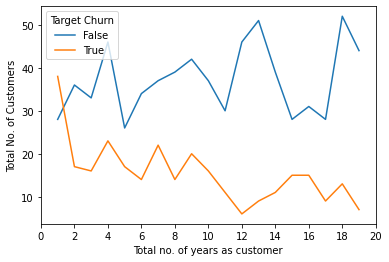

In [54]:
years_as_customers=retail.groupby(['Years_as_Customer','Target_Churn'])['Customer_ID'].count().to_frame()
years_as_customers_unstacked = years_as_customers.unstack('Target_Churn')
years_as_customers_unstacked.columns = years_as_customers_unstacked.columns.droplevel(0)
years_as_customers_unstacked.plot(kind='line')
plt.xlabel('Total no. of years as customer')
plt.ylabel('Total No. of Customers')
plt.legend(title='Target Churn')
max_x = years_as_customers_unstacked.index.max()
plt.xticks(np.arange(0, max_x + 2, 2))
plt.show()



The graph shows the relationship between the total number of years someone has been a customer and total customers for each target churn category.

We observe that churn is most prevalent in the early years, which decreases as the number of years increase.

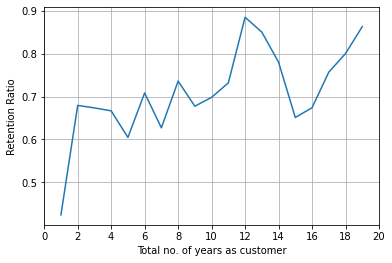

In [112]:
df=years_as_customers_unstacked.reset_index()
df['Retention Ratio']=df[False]/(df [False]+df[True]) 
plt.plot(df['Years_as_Customer'],df['Retention Ratio'])
plt.xlabel('Total no. of years as customer')
plt.ylabel('Retention Ratio')
plt.xticks(np.arange(0, 22, 2))
plt.grid()
plt.show()

The sharp increase in retention ratio in the early years suggests the importance of initial customer engagement and satisfaction.

The fluctuations in the mid-term indicate potential variability in customer loyalty, possibly due to changes in service or offerings.

 The upward trend in later years suggests that long-term customers tend to have higher retention ratios, highlighting the value of fostering long-term relationships.

### Number of Purchases

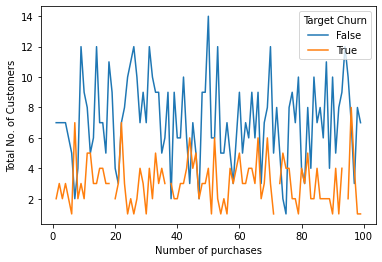

In [98]:
Num_Purchases=retail.groupby(['Num_of_Purchases','Target_Churn'])['Customer_ID'].count().to_frame()
Num_Purchases_unstacked = Num_Purchases.unstack('Target_Churn')
Num_Purchases_unstacked.columns = Num_Purchases_unstacked.columns.droplevel(0)
Num_Purchases_unstacked.plot(kind='line')
plt.xlabel('Number of purchases')
plt.ylabel('Total No. of Customers')
plt.legend(title='Target Churn')
max_x = Num_Purchases_unstacked.index.max()
plt.show()


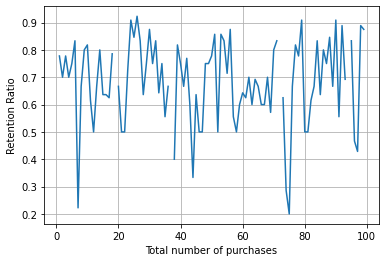

In [113]:
df=Num_Purchases_unstacked.reset_index()
df
df['Retention Ratio']=df[False]/(df [False]+df[True]) 
plt.plot(df['Num_of_Purchases'],df['Retention Ratio'])
plt.xlabel('Total number of purchases')
plt.ylabel('Retention Ratio')
plt.grid()
plt.show()

The two graphs above indicate that there isn't a storong relationship between the total number of purchases made by a customer and their likelihood of churn. 

In other words, simply increasing the number of purchases does not appear to have a significant impact on whether a customer will remain loyal or eventually leave. 

### Promotion Response

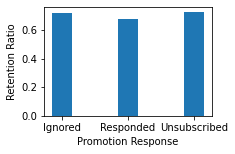

Target_Churn,False,True,Retention Ratio
Promotion_Response,,,
Ignored,215,84,0.719064
Responded,228,108,0.678571
Unsubscribed,264,101,0.723288


In [280]:
PromotionResponse_groupedby=retail.groupby(['Promotion_Response','Target_Churn'])['Customer_ID'].count().to_frame()
PromotionResponse_groupedby.rename(columns={'Customer_ID': 'Total Customers'}, inplace=True)
PromotionResponse_groupedby_reset = PromotionResponse_groupedby.reset_index()
pivot_PromotionResponse = PromotionResponse_groupedby_reset.pivot(index='Promotion_Response', columns='Target_Churn', values='Total Customers')
pivot_PromotionResponse['Retention Ratio']=pivot_PromotionResponse[False]/(pivot_PromotionResponse[False]+pivot_PromotionResponse[True]) 
plt.figure(figsize=(3, 2)) 
plt.bar(pivot_PromotionResponse.index,pivot_PromotionResponse['Retention Ratio'],width=0.3)
plt.xlabel('Promotion Response')
plt.ylabel('Retention Ratio') 
plt.show()
pivot_PromotionResponse


The data suggests that ignoring or unsubscribing from promotions is associated with higher retention rates compared to responding. It indicates that current promotional strategies may be ineffective, highlighting the need for more targeted and engaging promotional efforts to enhance customer retention and reduce churn rates.

## Correlation

Here we try to check whether there are any redundant features. Features that are highly correlated with each other may provide redundant information. Removing or combining such features can simplify the model and reduce overfitting.

,Customer_ID,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn
Customer_ID,1.000000,0.008962,-0.026498,-0.015484,-0.018746,0.018785,-0.014022,0.000433,-0.044346,0.023437,-0.009129,0.010428,0.079928
Age,0.008962,1.000000,0.038757,-0.033285,-0.024781,0.035109,0.007184,0.000331,-0.021226,0.019669,0.009790,-0.000269,-0.163866
Annual_Income,-0.026498,0.038757,1.000000,0.014436,-0.030301,0.021567,0.004925,0.039382,0.018577,0.015124,0.034668,0.004268,-0.047899
Total_Spend,-0.015484,-0.033285,0.014436,1.000000,0.037125,0.048856,-0.086144,0.010103,-0.036756,-0.004437,-0.038241,0.031414,0.023097
Years_as_Customer,-0.018746,-0.024781,-0.030301,0.037125,1.000000,0.021315,-0.021645,0.042259,-0.008638,-0.030330,-0.011783,-0.040478,-0.164385
Num_of_Purchases,0.018785,0.035109,0.021567,0.048856,0.021315,1.000000,-0.014752,-0.002935,0.011702,0.007697,-0.043216,0.010084,-0.003531
Average_Transaction_Amount,-0.014022,0.007184,0.004925,-0.086144,-0.021645,-0.014752,1.000000,0.013257,0.042396,0.013696,0.034158,-0.029002,-0.041885
Num_of_Returns,0.000433,0.000331,0.039382,0.010103,0.042259,-0.002935,0.013257,1.000000,0.080650,-0.003411,0.036108,-0.016324,-0.003275
Num_of_Support_Contacts,-0.044346,-0.021226,0.018577,-0.036756,-0.008638,0.011702,0.042396,0.080650,1.000000,0.034629,-0.023189,0.020172,0.017768
Satisfaction_Score,0.023437,0.019669,0.015124,-0.004437,-0.030330,0.007697,0.013696,-0.003411,0.034629,1.000000,0.019478,0.049553,-0.246564


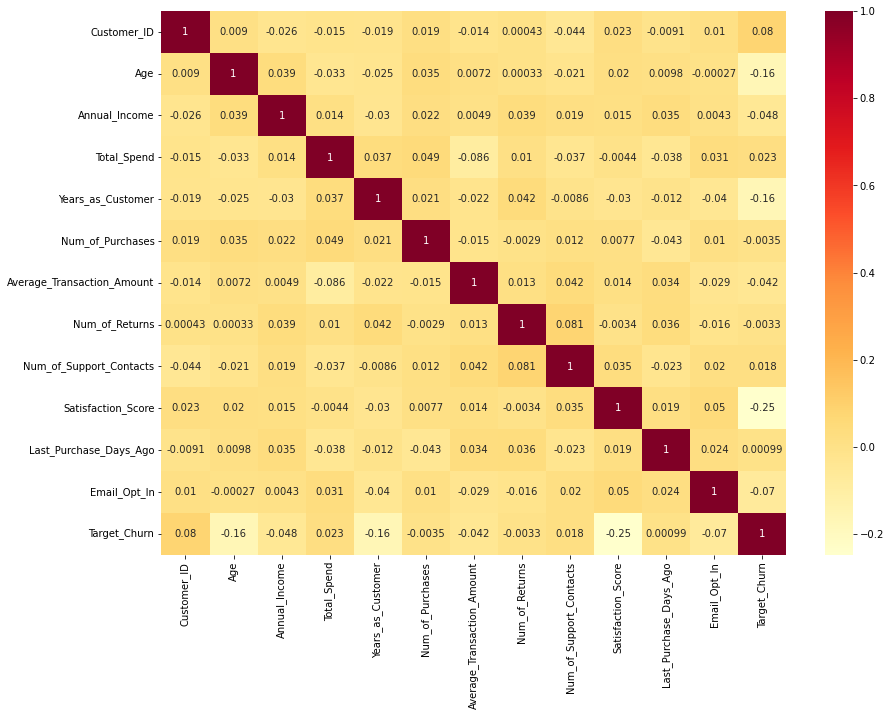

In [284]:
plt.figure(figsize=(14, 10))
corr=retail.corr()
sns.heatmap(corr,cmap="YlOrRd",annot=True)
corr
## we are using this annot=true so that the values are within the boxes

It is observed that there are no features that are highly correlated with each other. So we are good to continue with the existing ones.

# Feature Transformation

In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
retail.dtypes

Customer_ID                     int64
Age                             int64
Gender                         object
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int32
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int32
Last_Purchase_Days_Ago          int64
Email_Opt_In                     bool
Promotion_Response             object
Target_Churn                     bool
dtype: object

### Label Encoding:
We are using Label Encoding to handle fields that have categorical data:

In [119]:
categorical_cols = ["Gender","Email_Opt_In","Promotion_Response","Target_Churn"]
encoder = LabelEncoder()
for col in categorical_cols:
    retail[col] = encoder.fit_transform(retail[col])

In [120]:
retail.head(20)

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,2,45.150000,5892.58,5,22,453.80,2,0,3,129,1,1,0
1,2,65,1,79.510000,9025.47,13,77,22.90,2,2,3,227,0,1,0
2,3,18,1,29.190000,618.83,13,71,50.53,5,2,2,283,0,1,1
3,4,21,2,79.630000,9110.30,3,33,411.83,5,3,5,226,1,0,1
4,5,21,2,77.660000,5390.88,15,43,101.19,3,0,5,242,0,2,1
5,6,57,1,190.430000,255.19,19,85,417.78,5,1,4,130,0,2,0
6,7,27,1,172.130000,3512.55,3,77,316.18,0,3,1,61,1,2,0
7,8,37,2,88.900000,7270.90,4,87,63.61,3,4,3,224,0,0,0
8,9,39,2,24.460000,4935.49,1,21,173.80,9,2,4,126,1,1,1
9,10,68,2,169.590000,9803.57,17,34,481.18,6,1,2,171,1,2,0


In [121]:
retail.dtypes

Customer_ID                     int64
Age                             int64
Gender                          int32
Annual_Income                 float64
Total_Spend                   float64
Years_as_Customer               int64
Num_of_Purchases                int32
Average_Transaction_Amount    float64
Num_of_Returns                  int64
Num_of_Support_Contacts         int64
Satisfaction_Score              int32
Last_Purchase_Days_Ago          int64
Email_Opt_In                    int64
Promotion_Response              int32
Target_Churn                    int64
dtype: object

# Balancing imbalanced data:

   We have seen above that our data is mildly imbalanced. To handle this, we use the SMOTE technique.
   
   
   It is basically a data augmentation method that generates synthetic samples for minority classes in imbalanced datasets by interpolating between existing minority instances, helping improve classifier performance on underrepresented classes.

In [122]:
from imblearn.over_sampling import SMOTE

In [123]:
x=retail.drop(["Target_Churn","Customer_ID"],axis=1)
y=retail["Target_Churn"]

In [124]:
smote = SMOTE(random_state=123)
X_balanced, Y_balanced = smote.fit_resample(x,y)

C:\Users\absarma\Anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Train Test Split

In [125]:
from sklearn.model_selection import train_test_split 

In [126]:
X_train,X_test,y_train,y_test = train_test_split(X_balanced,Y_balanced,test_size=0.25,random_state = 42,stratify=Y_balanced)

In [127]:
print(y_train.value_counts().to_frame())
print(y_test.value_counts().to_frame())

   Target_Churn
1           530
0           530
   Target_Churn
1           177
0           177


# Feature Scaling

Feature scaling is essential for this dataset because some variables, such as Age and Annual Income, have different value ranges. 

Without scaling, features with larger ranges like Annual Income can disproportionately influence the model’s performance, overshadowing features with smaller ranges. 


To ensure that all features contribute equally and to enhance the effectiveness of our machine learning models, we apply feature scaling. 

In this case, we use the MinMaxScaler to normalize the data, bringing all features into a consistent scale.

In [128]:
from sklearn.preprocessing import MinMaxScaler 

In [129]:
scaler = MinMaxScaler()
X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

In [130]:
X_train

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response
1065,0.745098,0.5,0.410245,0.276257,0.722222,0.714286,0.377796,0.666667,0.50,0.25,0.355372,0.0,0.5
565,0.745098,0.0,0.321890,0.969631,0.111111,0.591837,0.087915,0.777778,0.25,0.50,0.509642,0.0,0.0
247,0.039216,0.0,0.073893,0.580638,0.500000,0.663265,0.902312,0.333333,0.00,0.75,0.818182,1.0,0.0
1266,0.019608,0.5,0.674933,0.557467,0.055556,0.765306,0.157277,1.000000,0.25,0.25,0.600551,1.0,0.0
1005,0.431373,0.0,0.403419,0.482558,0.277778,0.469388,0.531503,0.444444,0.25,0.50,0.840220,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,0.196078,1.0,0.605943,0.816277,0.944444,0.714286,0.159003,0.666667,1.00,1.00,0.669421,0.0,1.0
1079,0.823529,0.0,0.583560,0.571469,0.333333,0.500000,0.621119,0.333333,0.25,0.25,0.055096,0.0,0.0
356,0.058824,0.0,0.520755,0.795096,0.500000,0.010204,0.419149,1.000000,0.50,0.00,0.363636,1.0,1.0
1372,0.372549,0.5,0.180123,0.536346,0.222222,0.040816,0.611028,0.222222,0.75,0.25,0.553719,0.0,0.5


# Classification


We will first train multiple classification algorithms using the training data. Next, we will assess their performance on the test set using evaluation metrics like precision, recall, and F1-score. Finally,  the model that achieves the best results according to these metrics will be selected.

We use the following algorithms:

#### K Nearest Neighbor (KNN)
#### Decision Tree
#### Support Vector Machine
#### Logistic Regression

# Model Building

# K-Nearest Neighbours

In [131]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report 

In [176]:
knn_score = {}
for i in range(1,16):
    knn =  KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_test_pred = knn.predict(X_test)
    x = accuracy_score(y_test,y_test_pred)
    knn_score[i] = x

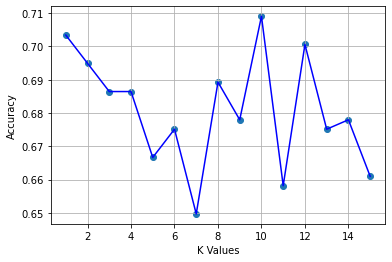

In [177]:
plt.scatter(list(knn_score.keys()),list(knn_score.values()))
plt.plot(list(knn_score.keys()),list(knn_score.values()),color="blue")
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [178]:
optimal_k = dict(sorted(knn_score.items(),key=lambda x:x[1],reverse=True))

In [179]:
knn =  KNeighborsClassifier(n_neighbors = list(optimal_k.keys())[0])
knn.fit(X_train,y_train)
y_test_pred = knn.predict(X_test)

This is the following confusion matrix and classification report:

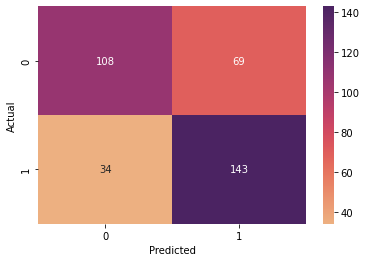

In [180]:
cf_knn = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cf_knn,annot=True,cmap="flare",linecolor="orange",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [142]:
report_dict_knn = classification_report(y_test,y_test_pred,output_dict=True)
report_df_knn = pd.DataFrame(report_dict_knn)
report_df_knn

,0,1,accuracy,macro avg,weighted avg
precision,0.760563,0.674528,0.70904,0.717546,0.717546
recall,0.610169,0.807910,0.70904,0.709040,0.709040
f1-score,0.677116,0.735219,0.70904,0.706167,0.706167
support,177.000000,177.000000,0.70904,354.000000,354.000000


# Decision Tree

Hyperparameters such as max_depth, min_samples_split, min_samples_leaf, and criterion play a crucial role in the performance of decision tree-based classification models.

To achieve optimal model performance, it is important to identify the best combination of these hyperparameters.

Here, use GridSearchCV to systematically find the optimal hyperparameter combination, ensuring our decision tree model achieves the best performance.

In [145]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}


grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',
    n_jobs=1
)


grid_search.fit(X_train, y_train)


best_model_DT = grid_search.best_estimator_


y_test_pred_DT = best_model_DT.predict(X_test)

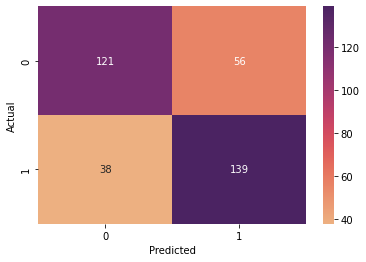

In [146]:
cf_DT= confusion_matrix(y_test,y_test_pred_DT)
sns.heatmap(cf_DT,annot=True,cmap="flare",linecolor="orange",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [147]:
report_dict_DT = classification_report(y_test,y_test_pred_DT,output_dict=True)
report_df_DT = pd.DataFrame(report_dict_DT)
report_df_DT

,0,1,accuracy,macro avg,weighted avg
precision,0.761006,0.712821,0.734463,0.736913,0.736913
recall,0.683616,0.785311,0.734463,0.734463,0.734463
f1-score,0.720238,0.747312,0.734463,0.733775,0.733775
support,177.000000,177.000000,0.734463,354.000000,354.000000


# Logistic Regression

Since the minimum of the loss function in logistic regression cannot be calculated in a closed form, we rely on optimization algorithms to estimate the model coefficients. 

In this case, we evaluate several solvers : "lbfgs", "newton-cg", "liblinear", "sag", and "saga" to identify which one delivers the best performance.

In [148]:
from sklearn.linear_model import LogisticRegression 

In [149]:
LR_score = {}
solvers = ["lbfgs","newton-cg","liblinear","sag","saga"]
for solver in solvers:
    lg =  LogisticRegression(solver = solver )
    lg.fit(X_train,y_train)
    y_test_pred_LR = lg.predict(X_test)
    x = accuracy_score(y_test,y_test_pred_LR)
    LR_score[solver] = x

In [150]:
LR_score

{'lbfgs': 0.6949152542372882,
 'newton-cg': 0.6949152542372882,
 'liblinear': 0.692090395480226,
 'sag': 0.6949152542372882,
 'saga': 0.6949152542372882}

In [151]:
best_solver = dict(sorted(LR_score.items(),key=lambda x:x[1],reverse=True))

In [152]:
lg =  LogisticRegression(solver = list(best_solver.keys())[0])
lg.fit(X_train,y_train)
y_test_pred_LR = lg.predict(X_test)

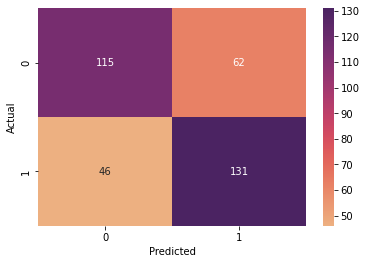

In [153]:
cf_lg = confusion_matrix(y_test,y_test_pred_LR)
sns.heatmap(cf_lg,annot=True,cmap="flare",linecolor="orange",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [154]:
report_dict_lg = classification_report(y_test,y_test_pred_LR,output_dict=True)
report_df_lg = pd.DataFrame(report_dict_lg)
report_df_lg

,0,1,accuracy,macro avg,weighted avg
precision,0.714286,0.678756,0.694915,0.696521,0.696521
recall,0.649718,0.740113,0.694915,0.694915,0.694915
f1-score,0.680473,0.708108,0.694915,0.694291,0.694291
support,177.000000,177.000000,0.694915,354.000000,354.000000


# Random Forest:

In [181]:
from sklearn.ensemble import RandomForestClassifier 

In [182]:
rf_score = {}
for i in range(1,30):
    rf =  RandomForestClassifier(n_estimators = i,random_state=42)
    rf.fit(X_train,y_train)
    y_test_pred = rf.predict(X_test)
    x = accuracy_score(y_test,y_test_pred)
    rf_score[i] = x

The no. of estimators(no. of Decision Tress) that give the best accuracy on the dataset is chosen.

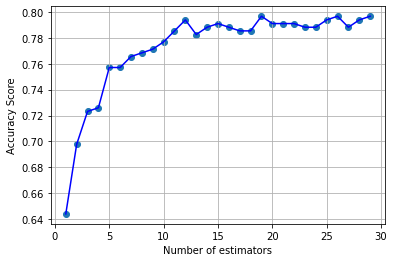

In [183]:
plt.scatter(list(rf_score.keys()),list(rf_score.values()))
plt.plot(list(rf_score.keys()),list(rf_score.values()),color="blue")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy Score")
plt.grid()
plt.show()


In [184]:
optimal_est = dict(sorted(rf_score.items(),key=lambda x:x[1],reverse=True))

In [185]:
optimal_est

{19: 0.7966101694915254,
 26: 0.7966101694915254,
 29: 0.7966101694915254,
 12: 0.7937853107344632,
 25: 0.7937853107344632,
 28: 0.7937853107344632,
 15: 0.7909604519774012,
 20: 0.7909604519774012,
 21: 0.7909604519774012,
 22: 0.7909604519774012,
 14: 0.788135593220339,
 16: 0.788135593220339,
 23: 0.788135593220339,
 24: 0.788135593220339,
 27: 0.788135593220339,
 11: 0.7853107344632768,
 17: 0.7853107344632768,
 18: 0.7853107344632768,
 13: 0.7824858757062146,
 10: 0.7768361581920904,
 9: 0.7711864406779662,
 8: 0.768361581920904,
 7: 0.7655367231638418,
 5: 0.7570621468926554,
 6: 0.7570621468926554,
 4: 0.7259887005649718,
 3: 0.7231638418079096,
 2: 0.6977401129943502,
 1: 0.6440677966101694}

In [186]:
list(optimal_est.keys())[0]

19

In [187]:
rf =  RandomForestClassifier(n_estimators=19,random_state=42)
rf.fit(X_train,y_train)
y_test_pred = rf.predict(X_test)

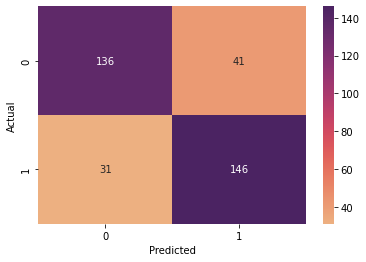

In [188]:
cf_rf = confusion_matrix(y_test,y_test_pred)
sns.heatmap(cf_rf,annot=True,cmap="flare",linecolor="orange",fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [189]:
report_dict_rf = classification_report(y_test,y_test_pred,output_dict=True)
report_df_rf = pd.DataFrame(report_dict_rf)
report_df_rf

,0,1,accuracy,macro avg,weighted avg
precision,0.814371,0.780749,0.79661,0.797560,0.797560
recall,0.768362,0.824859,0.79661,0.796610,0.796610
f1-score,0.790698,0.802198,0.79661,0.796448,0.796448
support,177.000000,177.000000,0.79661,354.000000,354.000000


#### We can thus conclude by saying that the Random Forest Classifier would be a relatively better algorithm for the above Customer Churn Prediction as it obtained a higher score using various evaluation metrics.